## Project on decision tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.Outcome.unique()

array([1, 0], dtype=int64)

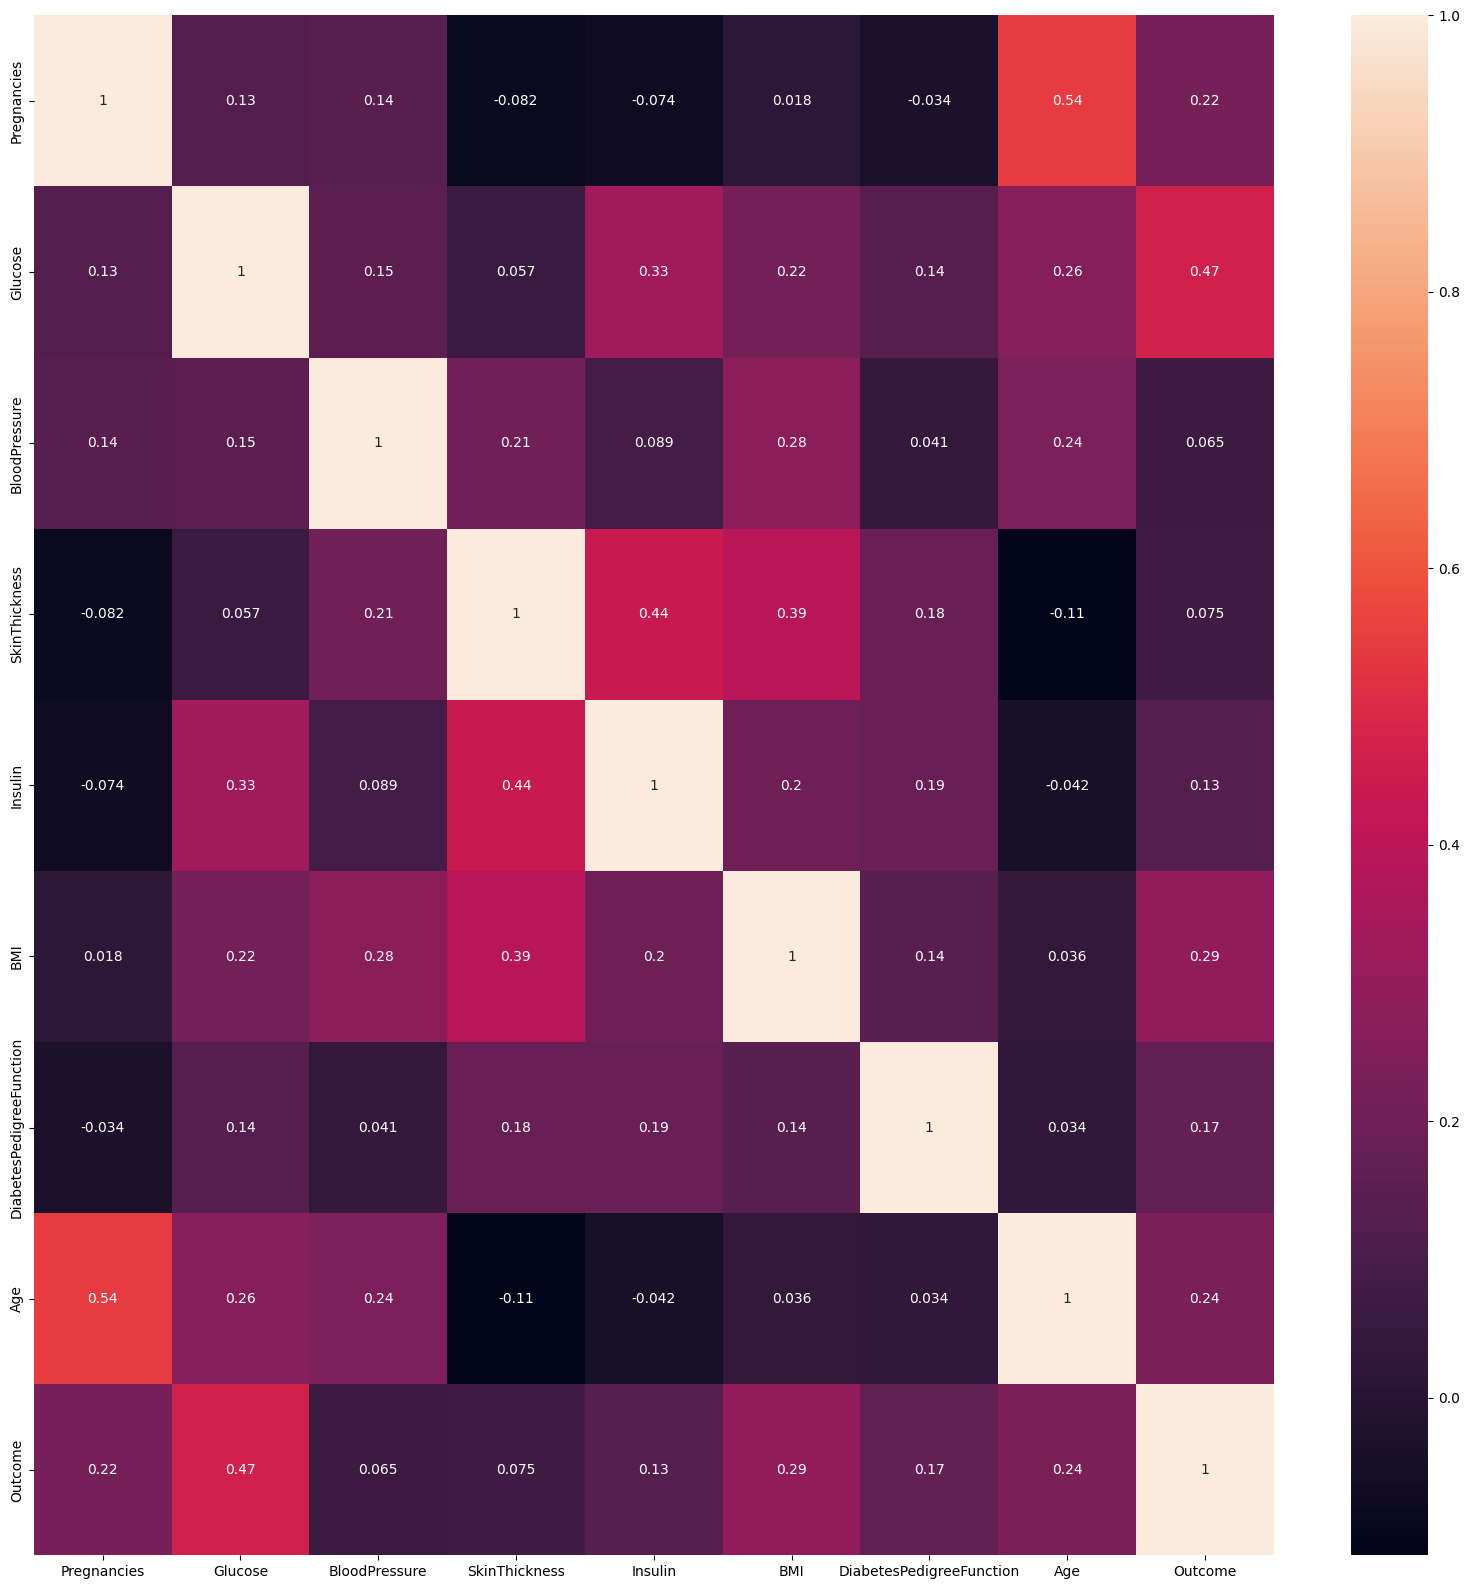

In [6]:
correlation=df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation,annot=True)
plt.show()

In [7]:
df.shape

(768, 9)

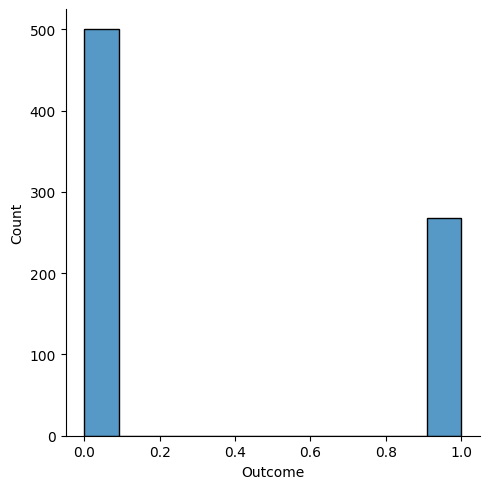

In [8]:
sns.displot(df["Outcome"])

In [9]:
X = df.loc[:,["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
Y = df["Outcome"]

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Train test split

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
X_train.shape

(614, 8)

In [16]:
X_test.shape

(154, 8)

In [17]:
Y_train.shape

(614,)

In [18]:
Y_test.shape

(154,)

## Model training

In [19]:
clf = DecisionTreeClassifier(criterion="gini",max_depth = 3, min_samples_split = 6)

In [20]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=6)

[Text(0.5, 0.875, 'x[1] <= 0.207\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= -0.403\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= -0.132\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= -0.716\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= -0.259\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 0.801\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(0.875, 0.375, 'x[1] <= 1.396\ngini = 0.4\nsamples = 163\nval

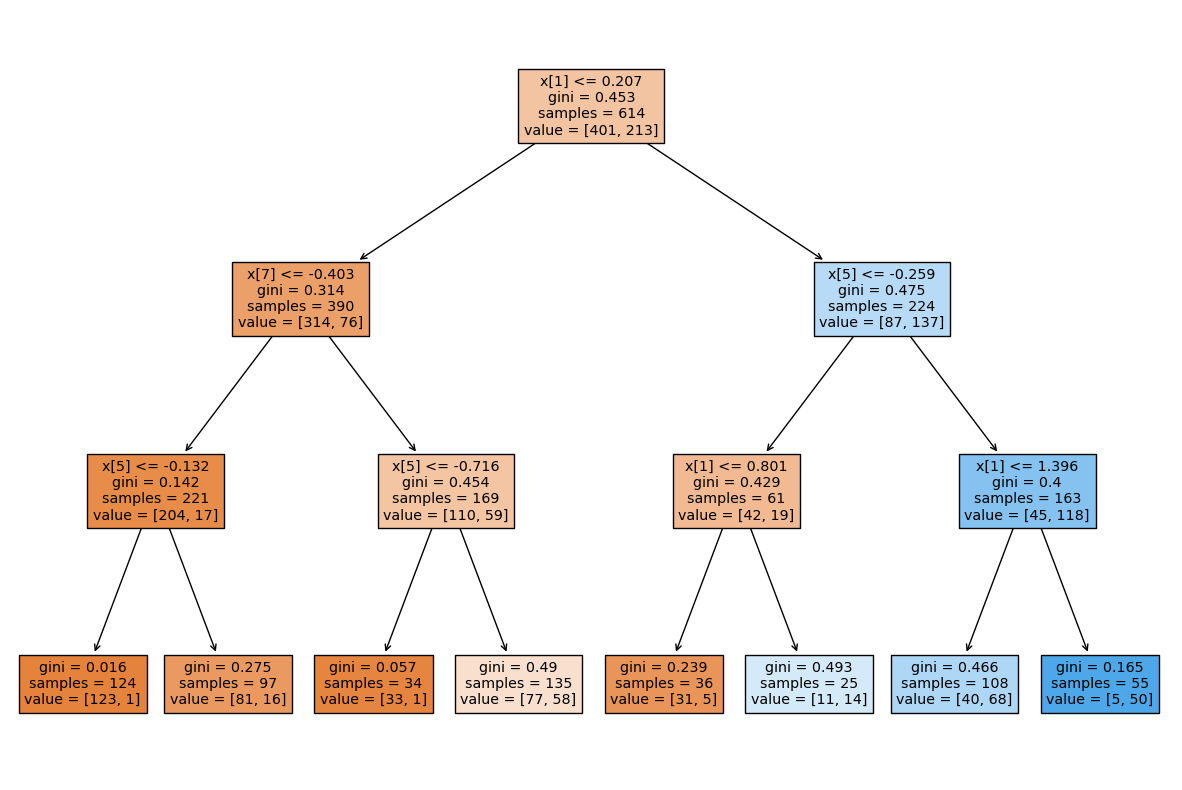

In [21]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled = True)

# Model predictions

In [22]:
Y_value_counts=Y.value_counts()
print(Y_value_counts)


Outcome
0    500
1    268
Name: count, dtype: int64


In [23]:
param_dist = {
    "criterion" : ["ginni","entropy"],
    "max_depth" : [2,3,4,5,6,7,None],
    "min_samples_split" : [2,3,4,5,6,7,8],
    "min_samples_leaf"  : [1,2],
    "max_features"      : [3,4,5,6]
}

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(clf, param_grid = param_dist, refit = True)
grid.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1960 fits failed out of a total of 3920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=6),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, None],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [25]:
print(grid.best_params_) #to find the best parameter after tuning
#to find how our model looks after hyper parameter tuning
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=6,
                       min_samples_leaf=2)


In [26]:
grid_predictions = grid.predict(X_test)

print(accuracy_score(Y_test,grid_predictions)*100)

print(f1_score(Y_test,grid_predictions))#predictions of the model

77.92207792207793
0.6964285714285715
